# SciPy
![SciPy](https://raw.githubusercontent.com/scipy/scipy-sphinx-theme/master/_static/scipyshiny_small.png)

- Baut auf NumPy auf
- Kann numerisch integrieren, DGLs lösen, optimieren, minimieren, …
- Enthält auch physikalische Konstanten und wichtige mathematische Funktionen

Überblick über (fast) alles weitere was SciPy kann gibt es hier:

- https://github.com/MaxNoe/scientific_python_notebooks/blob/master/scipy.ipynb

Diese Einführung konzentriert sich auf die folgenden Themen:

- Abrufen von physikalischen Naturkonstanten samt Unsicherheit und Einheit
- Lineare und Nichtlineare Regression

## 1) Abrufen von Naturkonstanten

Wenn solche Konstanten genutzt werden, muss das korrekt mitgeteilt, also zitiert werden.
Darauf gehen wir nächste Woche im LaTeX-Workshop ein :-)

(Quelle hier: *scipy + version*)

In [44]:
# physical constants
import scipy.constants as const

const.epsilon_0

8.854187817620389e-12

In [45]:
# a list of all included constants
# search the web for "scipy physical constants reference guide" to find the same list
const.physical_constants

{'Wien displacement law constant': (0.0028977685, 'm K', 5.1e-09),
 'atomic unit of 1st hyperpolarizablity': (3.20636151e-53,
  'C^3 m^3 J^-2',
  2.8e-60),
 'atomic unit of 2nd hyperpolarizablity': (6.2353808e-65,
  'C^4 m^4 J^-3',
  1.1e-71),
 'atomic unit of electric dipole moment': (8.47835309e-30, 'C m', 7.3e-37),
 'atomic unit of electric polarizablity': (1.648777274e-41,
  'C^2 m^2 J^-1',
  1.6e-49),
 'atomic unit of electric quadrupole moment': (4.48655124e-40,
  'C m^2',
  3.9e-47),
 'atomic unit of magn. dipole moment': (1.8548019e-23, 'J T^-1', 1.6e-30),
 'atomic unit of magn. flux density': (235051.756758, 'T', 7.1e-05),
 'deuteron magn. moment': (4.33073482e-27, 'J T^-1', 3.8e-34),
 'deuteron magn. moment to Bohr magneton ratio': (0.0004669754567, '', 5e-12),
 'deuteron magn. moment to nuclear magneton ratio': (0.8574382329,
  '',
  9.2e-09),
 'deuteron-electron magn. moment ratio': (-0.0004664345548, '', 5e-12),
 'deuteron-proton magn. moment ratio': (0.3070122084, '', 4.5

In [46]:
# convert temperatures:
print(const.convert_temperature(100, 'c', 'K'))
print(const.convert_temperature(100, 'kelvin', 'Celsius'))

373.15
-173.14999999999998


In [47]:
# convert angles:
print(np.rad2deg(np.pi))
print(np.deg2rad(90))

180.0
1.5707963267948966


In [48]:
const.physical_constants["proton mass"]
# value, unit, error

(1.67262192369e-27, 'kg', 5.1e-37)

## 2) Fitten
Oft möchte man eine Funktion mit freien Parametern, zum Beispiel eine Erwartung aus der Theorie, an die gemessenen Werte anpassen.
Dies nennt man Fit.

Die Funktion `scipy.optimize.curve_fit` nutzt die numerische Methode der kleinsten Quadrate, die arbiträre Funktionen fitten kann.
Für Funktionen, die eine Linearkombination von Einzelfunktionen sind, also

$$
f(x) = \sum_i^N a_i \cdot f_i(x)
$$

existiert eine analytische Lösung. Deswegen sollten in solchen Fällen (z.B. alle Polynome) entsprechende Funktionen genutzt werden (z.B. `np.polyfit`)

### 2.1) Lineare Regression bzw. Regression von Polynomen

Im folgenden wird eine lineare Regression mit `np.polyfit` durchgeführt:

$$
f(x) = a + b \cdot x
$$

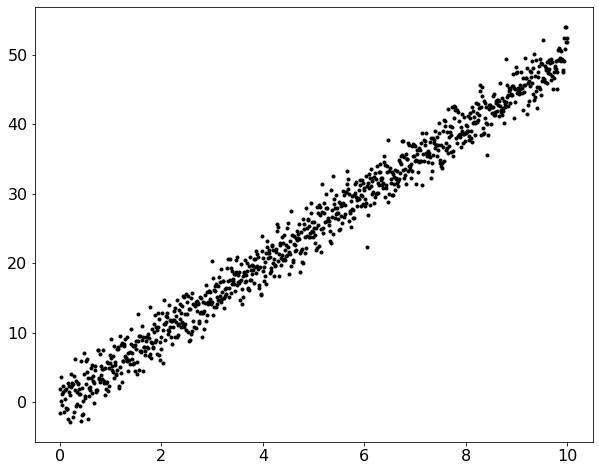

In [49]:
# prepare plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16

# load data
x, y = np.genfromtxt('data/example_data_linear.txt', unpack=True)

plt.plot(x, y, 'k.', label="example data")

In [50]:
# Fit a polynomial of degree 1, return covariance matrix
params, covariance_matrix = np.polyfit(x, y, deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value:.3f} ± {error:.3f}')

a = 4.977 ± 0.021
b = 0.070 ± 0.124


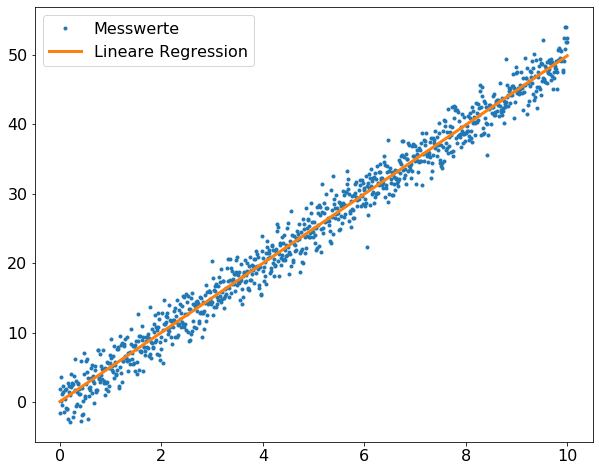

In [51]:
x_plot = np.linspace(0, 10)

plt.plot(x, y, '.', label="Messwerte")
plt.plot(
    x_plot,
    params[0] * x_plot + params[1],
    label='Lineare Regression',
    linewidth=3,
)
plt.legend(loc="best")

### 2.2) Nichtlineare Funktionen der Parameter

Wenn eine Funktion nicht linear bezüglich der freien Parameter ist, muss die Lösung numerisch gefunden werden.

Hierbei kann es sein, dass der Minimierungsalgorithmus in lokale Maxima hineinläuft und unsinnige Ergebnisse liefert,
dies kann mit guten Startwerten meistens vermieden werden.

Als Beispiel einer komplexeren Funktion wird im Folgenden die `Sigmoidfunktion` verwendet (Ähnlich zum `tanh`):

$$ f(x; a, b, c) = \frac{a}{1 + \exp(-(x-b))} + c$$

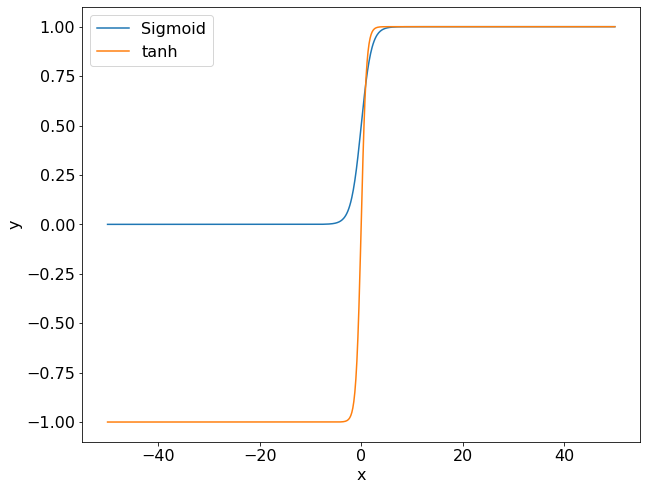

In [52]:
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-(x - b))) + c
    

x_plot = np.linspace(-50, 50, 1000)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_plot, sigmoid(x_plot, 1, 0, 0), label="Sigmoid")
plt.plot(x_plot, np.tanh(x_plot), label="tanh")
plt.legend()

Die Messwerte aus einem Praktikumsversuch:

Text(0, 0.5, '$GP$')

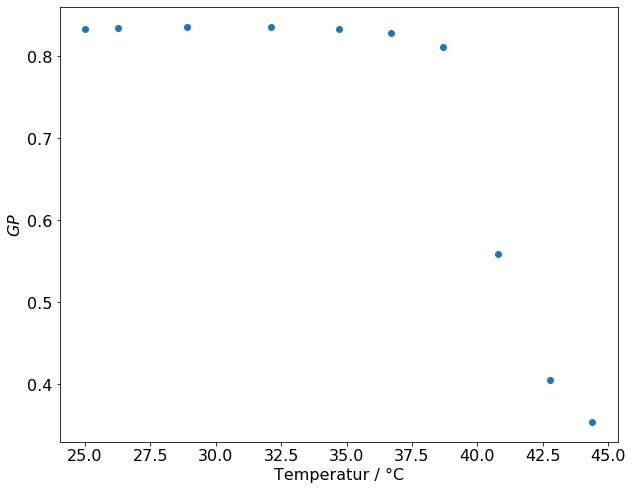

In [53]:
x, y = np.loadtxt('data/fit_data_with_init_values.txt', unpack=True)

plt.plot(x, y, 'o', label=r'Messwerte')

plt.xlabel('Temperatur / °C')
plt.ylabel('$GP$')

Ein einfacher Fit wie oben funktioniert hier nicht so gut:

In [54]:
from scipy.optimize import curve_fit
params, covariance_matrix = curve_fit(sigmoid, x, y)

uncertainties = np.sqrt(np.diag(covariance_matrix))

for name, value, uncertainty in zip('abc', params, uncertainties): 
    print(f'{name} = {value:8.3f} ± {uncertainty:.3f}')

a = -307.056 ± inf
b =    1.000 ± inf
c =  307.769 ± inf


/home/karl/.local/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Schaut man sich die berechnete Ausgleichskurve an sieht man auch,   
dass das nicht stimmen kann:

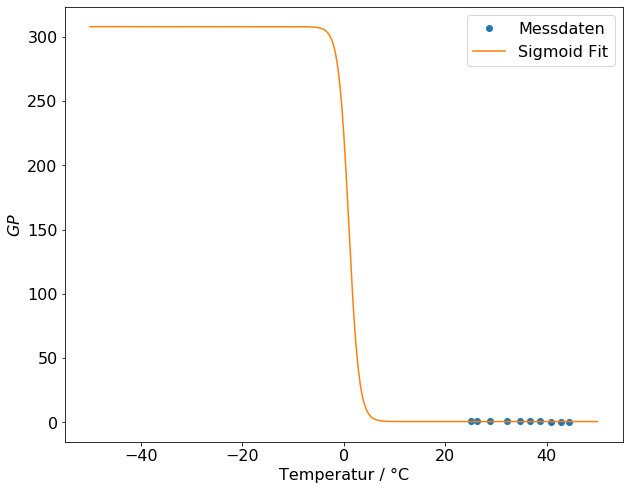

In [55]:
plt.xlabel('Temperatur / °C')
plt.ylabel('$GP$')


plt.plot(x, y, 'o', label='Messdaten')
plt.plot(x_plot, sigmoid(x_plot, *params), "-", label=r'Sigmoid Fit')

plt.legend(loc='best')

**Was macht man jetzt?**   
Bei solchen Fragen hilft die Dokumentation der Pythonmodule (hier: scipy) oder _Stackoverflow_ weiter.   
Folgendes _Google-Muster_ ist ein guter Anfang (beachte englische Sprache):  

    python <module-name> <function-name> <What went wrong?>

Also in diesem Fall: `python scipy curve_fit fails`

Damit dieser Fit funktioniert müssen die Startwerte für den internen   
Minimierungsalgorithmus angepasst werden.  
Aus der Dokumentation/Stackoverflow wissen wir jetzt, dass man mit dem   
_keyword argument_ `p0` (Standardwert is `p0=(1,1,1)`) die Startwerte einstellt:

In [56]:
params, covariance_matrix = curve_fit(sigmoid, x, y, p0=(-1, 40, 1))


uncertainties = np.sqrt(np.diag(covariance_matrix))

for name, value, uncertainty in zip('abc', params, uncertainties): 
    print(f'{name} = {value:8.3f} ± {uncertainty:.3f}')

a =   -0.494 ± 0.014
b =   40.668 ± 0.137
c =    0.839 ± 0.006


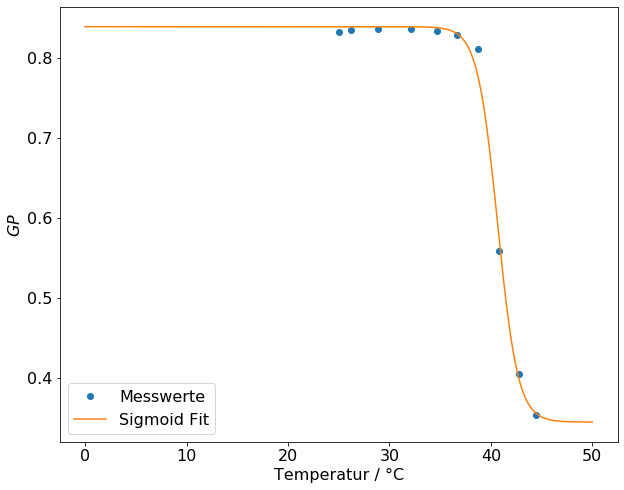

In [57]:
plt.xlabel('Temperatur / °C')
plt.ylabel('$GP$')

x_plot = np.linspace(0, 50, 1000)


plt.plot(x, y, 'o', label='Messwerte')
plt.plot(x_plot, sigmoid(x_plot, *params), "-", label='Sigmoid Fit')

plt.legend(loc='best')

Zum Vergleich der beiden Anfangswerte (seeds) kann man sich die einmal ansehen   
und mit den angepassten Parametern vergleichen:

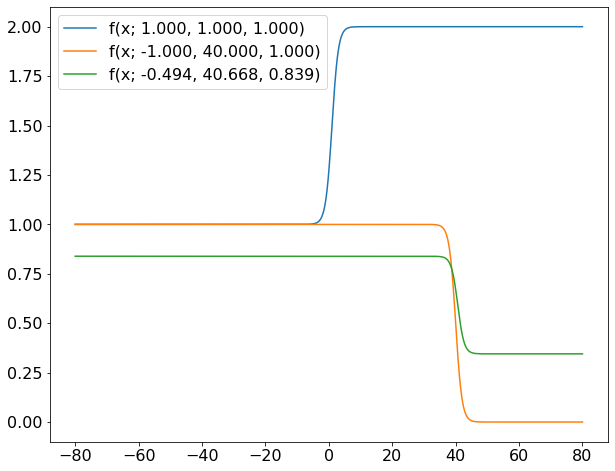

In [58]:
default_seed = (1,1,1)
good_seed = (-1,40,1)

parameter = [default_seed, good_seed, params]

x_plot = np.linspace(-80, 80, 1000)

for a, b, c in parameter:
    plt.plot(x_plot, sigmoid(x_plot, a, b, c),  label=f"f(x; {a:0.3f}, {b:0.3f}, {c:0.3f})")
    
plt.legend()

Die richtigen Startwerte findet man entweder durch 

1. _trial and error_ => einfach ausprobieren bis es klappt

2. _nachdenken_ => siehe unten
    
Im obigen Beispiel musste nur Parameter `b` angepasst werden,   
weil der für die Form der Kurve sehr wichtig ist.

$$ f(x; a, b, c) = \frac{a}{1 + \exp(-(x-b))} + c$$

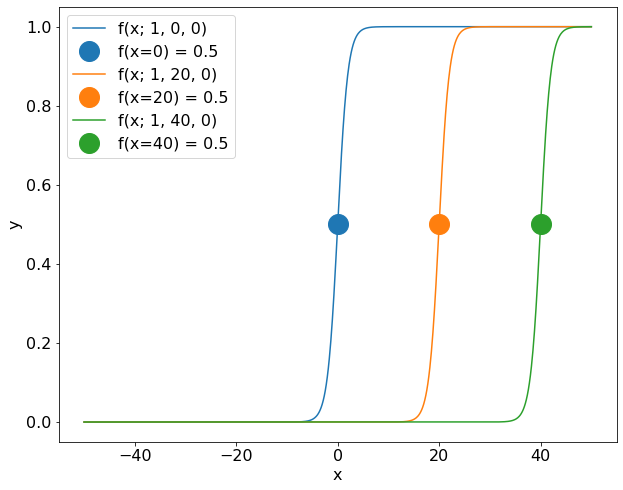

In [59]:
bs = [0, 20, 40]

x_plot = np.linspace(-50, 50, 1000)

plt.xlabel('x')
plt.ylabel('y')


for b in bs:
    
    line, = plt.plot(x_plot, sigmoid(x_plot, 1, b, 0),  label=f"f(x; 1, {b}, 0)")
    
    plt.plot(
        b,
        sigmoid(b, 1, b, 0),
        "o",
        color=line.get_color(),
        ms=20,
        label=f"f(x={b}) = {sigmoid(b, 1, b, 0)}"
    )
    

plt.legend()

Der Parameter $b$ gibt den $x$-Wert an bei dem die Funktion auf die Hälfte des Maximums abgefallen ist.   
Bei den Messwerten oben ist die Stelle ungefähr bei $x=40$ also ist `b=40` ein guter Startwert.

Das lässt sich auch automatisieren:

(40.8, 0.5586250642)

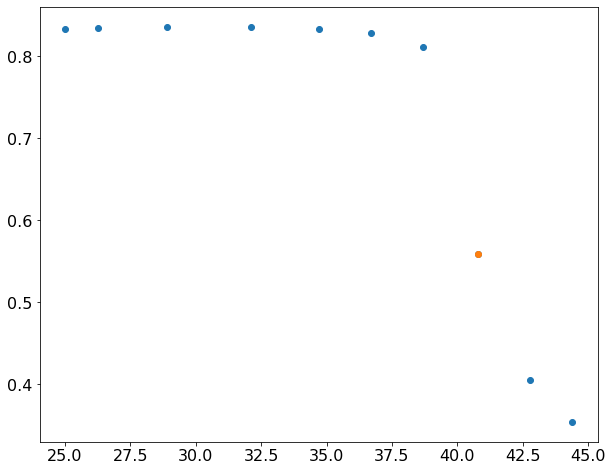

In [60]:
plt.plot(x, y, 'o')

idx = np.argmin(np.abs(y - 0.5))

plt.plot(x[idx], y[idx], 'o')

x[idx], y[idx]

## 3) Weitere nützliche Funktionen für das Praktikum

Folgende Eigenschaften von Scipy sollen nur die Idee vermitteln, was noch alles möglich ist.

### 3.1) Statistische Verteilungen und Funktionen

Das `scipy.stats` Modul enthält viele Wahrscheinlichkeitsverteilungen und -funktionen. Als Beispiel wird hier jedoch nur die Standardabweichung des Mittelwertes berechnet.

In [61]:
import numpy as np
x = np.array([2, 5, 7])  # create test array

from scipy.stats import gmean, sem
print(sem(x)) # standard error of the mean

1.4529663145135578


### 3.2) Finden von Peaks

Das `scipy.signal` Modul enthält Funktionen zur Signalverarbeitung

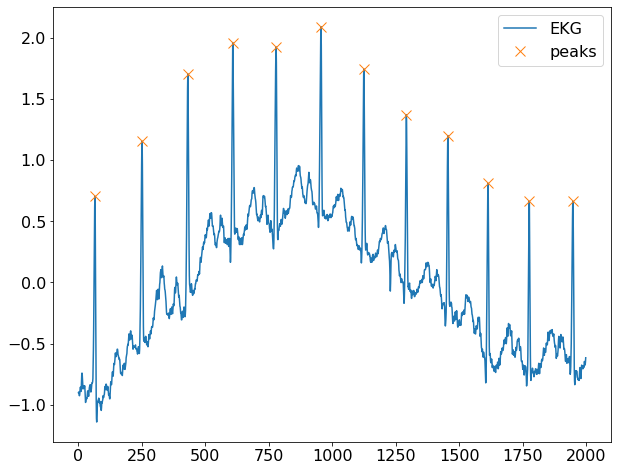

In [62]:
# example data
from scipy.misc import electrocardiogram
x = electrocardiogram()[2000:4000]

# find peaks
from scipy.signal import find_peaks
peaks, _ = find_peaks(x, distance=150)

plt.plot(x, label='EKG')
plt.plot(peaks, x[peaks], "x", ms=10, label='peaks')
plt.legend(loc='best')
plt.show()